In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
with open("IMDb_Scrape.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [10]:
df['G'] = (df['MPAA Certification'] == 'G').astype(int)
df['PG'] = (df['MPAA Certification'] == 'PG').astype(int)
df['PG-13'] = (df['MPAA Certification'] == 'PG-13').astype(int)
df['R'] = (df['MPAA Certification'] == 'R').astype(int)

In [11]:
X = df[['G', 'PG', 'PG-13', 'R']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     45.01
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.86e-36
Time:                        14:20:07   Log-Likelihood:                -2940.0
No. Observations:                2332   AIC:                             5890.
Df Residuals:                    2327   BIC:                             5919.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.6308      0.106     71.989      0.000         7.423     7.839
G             -0.2491      0.162     -1.541      0.123        -0.566     0.068
PG            -0.7824      0.117     -6.715      0.000        -1.011    -0.554
PG-13         -1.0125      0.110     -9.196      0.000        -1.228    -0.797
R             -0.5963      0.109     -5.463      0.000        -0.810    -0.382
==============================================================================
Omnibus:                      206.711   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.527
Skew:                          -0.611   Prob(JB):                     4.70e-82
Kurtosis:                       4.537   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
mean_score_G = df[df['G'] == 1].Score.mean()
mean_score_PG = df[df['PG'] == 1].Score.mean()
mean_score_PG13 = df[df['PG-13'] == 1].Score.mean()
mean_score_R = df[df['R'] == 1].Score.mean()

mean_error_G = df[df['G'] == 1].Score.std() / df[df['G'] == 1].Score.count()**0.5 
mean_error_PG = df[df['PG'] == 1].Score.std() / df[df['PG'] == 1].Score.count()**0.5 
mean_error_PG13 = df[df['PG-13'] == 1].Score.std() / df[df['PG-13'] == 1].Score.count()**0.5 
mean_error_R = df[df['R'] == 1].Score.std() / df[df['R'] == 1].Score.count()**0.5 

(3.5, -0.5)

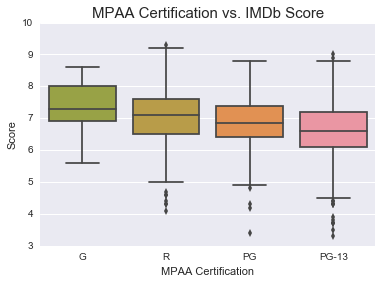

In [535]:
plt.title('MPAA Certification vs. IMDb Score', fontsize = 15)
plt.xlabel('MPAA Certification')
plt.ylabel('IMDb Score')
plt.ylim([6,8])

sns.boxplot(df['MPAA Certification'], df.Score);
plt.ylim(3,10)
plt.xlim(3.5,-.5)

In [451]:
# Creating many secondary features
df['2'] = (df.Title.apply(lambda x: '2' in x)).astype(int)
df['3'] = (df.Title.apply(lambda x: '3' in x)).astype(int)
df['4'] = (df.Title.apply(lambda x: '4' in x)).astype(int)
df['Colon'] = (df.Title.apply(lambda x: ':' in x)).astype(int)
df['The'] = (df.Title.apply(lambda x: 'The' in x)).astype(int)
df['Title Length'] = (df.Title.apply(lambda x: len(x.split()))).astype(int)
df['Number of Directors'] = (df.Directors.apply(lambda x: len(x.split(',')))).astype(int)
df['Christopher Nolan'] = (df.Directors == 'Christopher Nolan').astype(int)
df['Matt Damon'] = (df.Stars.apply(lambda x: 'Matt Damon' in x)).astype(int)
df['Brad Pitt'] = (df.Stars.apply(lambda x: 'Brad Pitt' in x)).astype(int)
df['Adam Sandler'] = (df.Stars.apply(lambda x: 'Adam Sandler' in x)).astype(int)
df['Christian Bale'] = (df.Stars.apply(lambda x: 'Christian Bale' in x)).astype(int)
df['Leonardo DiCaprio'] = (df.Stars.apply(lambda x: 'Leonardo DiCaprio' in x)).astype(int)
df['Quentin Tarantino'] = (df.Directors == 'Quentin Tarantino').astype(int)
df['Alfred Hitchcock'] = (df.Directors == 'Alfred Hitchcock').astype(int)
df['Clint Eastwood'] = (df.Directors == 'Clint Eastwood').astype(int)
df['Clint Eastwood_Act'] = (df.Stars.apply(lambda x: 'Clint Eastwood' in x)).astype(int)
df['Animation']  = (df.Genres.apply(lambda x: 'Animation' in x)).astype(int)
df['Number of Genres'] = (df.Genres.apply(lambda x: len(x.split(',')))).astype(int)

In [449]:
# Re-order dataframe to have score first
df = pd.DataFrame(df.loc[:,'Score']).join((df.loc[:, 'Title':'Stars']).join(df.loc[:, 'G':]))
df

,Score,Title,Release Year,Domestic Gross (million USD),MPAA Certification,Runtime,Number of Votes,Genres,Directors,Stars,...,Christopher Nolan,Adam Sandler,Quentin Tarantino,Alfred Hitchcock,Animation,Number of Genres,Christian Bale,Leonardo DiCaprio,Clint Eastwood,Clint Eastwood_Act
0,6.7,Suicide Squad,2016,320.85,PG-13,123,219255,"Action, Adventure, Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",...,0,0,0,0,0,3,0,0,0,0
1,8.0,Captain America: Civil War,2016,408.08,PG-13,147,323106,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Chris Evans, Robert Downey Jr., Scarlett Johan...",...,0,0,0,0,0,3,0,0,0,0
2,7.2,X-Men: Apocalypse,2016,155.33,PG-13,144,189465,"Action, Adventure, Sci-Fi",Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",...,0,0,0,0,0,3,0,0,0,0
3,8.1,Zootopia,2016,341.26,PG,108,201262,"Animation, Adventure, Comedy","Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",...,0,0,0,0,1,3,0,0,0,0
4,7.6,The Jungle Book,2016,364.00,PG,106,141465,"Adventure, Drama, Family",Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",...,0,0,0,0,0,3,0,0,0,0
5,5.4,Ghostbusters,2016,127.45,PG-13,116,91482,"Action, Comedy, Fantasy",Paul Feig,"Melissa McCarthy, Kristen Wiig, Kate McKinnon,...",...,0,0,0,0,0,3,0,0,0,0
6,6.7,The Secret Life of Pets,2016,364.33,PG,87,52894,"Animation, Adventure, Comedy","Yarrow Cheney, Chris Renaud","Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",...,0,0,0,0,1,3,0,0,0,0
7,8.1,The Revenant,2015,183.64,R,156,428618,"Adventure, Drama, Thriller",Alejandro G. Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",...,0,0,0,0,0,3,0,1,0,0
8,7.1,Warcraft,2016,47.17,PG-13,123,140547,"Action, Adventure, Fantasy",Duncan Jones,"Travis Fimmel, Paula Patton, Ben Foster, Domin...",...,0,0,0,0,0,3,0,0,0,0
9,6.4,The Legend of Tarzan,2016,126.59,PG-13,110,66031,"Action, Adventure, Drama",David Yates,"Alexander Skarsgård, Rory J. Saper, Christian ...",...,0,0,0,0,0,3,0,0,0,0


In [504]:
X = df.ix[:, [2,5,12,11]+range(14,len(df.columns))]
#X = df.ix[:, ['Release Year', 'Runtime', 'R', 'PG-13', 'Animation']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     68.22
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.86e-152
Time:                        21:32:16   Log-Likelihood:                -2649.2
No. Observations:                2332   AIC:                             5326.
Df Residuals:                    2318   BIC:                             5407.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                34.8697      2.885     12.087      0.000        29.212    40.527
Release Year         -0.0148      0.001    -10.266      0.000        -0.018    -0.012
Runtime               0.0165      0.001     20.270      0.000         0.015     0.018
PG-13                -0.3865      0.035    -10.933      0.000        -0.456    -0.317
PG                   -0.2860      0.052     -5.532      0.000        -0.387    -0.185
3                    -0.3703      0.116     -3.198      0.001        -0.597    -0.143
4                    -0.6850      0.211     -3.251      0.001        -1.098    -0.272
Colon                -0.1412      0.060     -2.360      0.018        -0.259    -0.024
Christopher Nolan     1.2669      0.253      5.003      0.000         0.770     1.764
Adam Sandler         -0.4324      0.148     -2.923      0.003        -0.722    -0.142
Quentin Tarantino     0.6666      0.288      2.315      0.021         0.102     1.231
Alfred Hitchcock      0.8236      0.384      2.145      0.032         0.070     1.577
Animation             0.6798      0.073      9.344      0.000         0.537     0.822
Number of Genres     -0.0560      0.026     -2.164      0.031        -0.107    -0.005
==============================================================================
Omnibus:                      289.432   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.653
Skew:                          -0.747   Prob(JB):                    1.02e-135
Kurtosis:                       5.041   Cond. No.                     3.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [491]:
# Removing insignificant features

del df['2']
del df['Christian Bale']
del df['Leonardo DiCaprio']
del df['Brad Pitt']
del df['Clint Eastwood']
del df['Clint Eastwood_Act']
del df['Matt Damon']
del df['Number of Directors']
del df['The']
del df['Title Length']

KeyError: 'Christian Bale'

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

/Users/kevin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


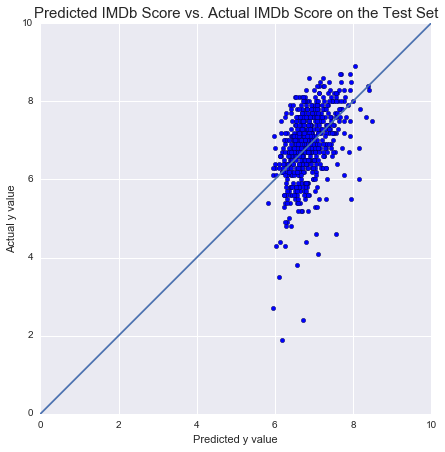

In [430]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.25)
y_predicted = fit.predict(X_test)

plt.figure(figsize=(7,7))
plt.title('Predicted IMDb Score vs. Actual IMDb Score on the Test Set', fontsize=15)
plt.ylim(0,10)
plt.xlim(0,10)
plt.xlabel('Predicted y value')
plt.ylabel('Actual y value')
plt.scatter(y_predicted, y_test)
plt.plot(xrange(11), xrange(11));

In [431]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.196051542063999

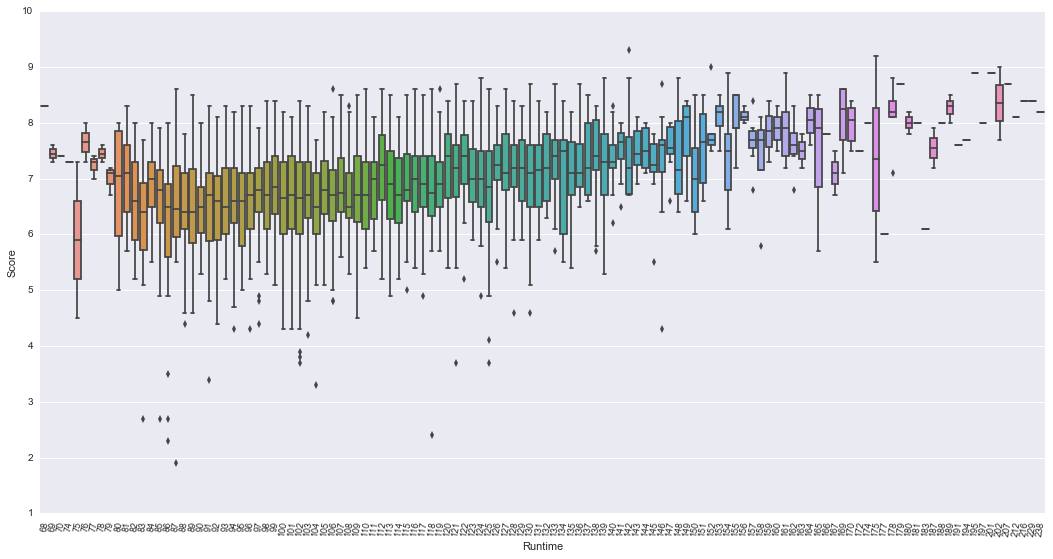

In [264]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=80, fontsize=9);
sns.boxplot(df['Runtime'], df.Score);

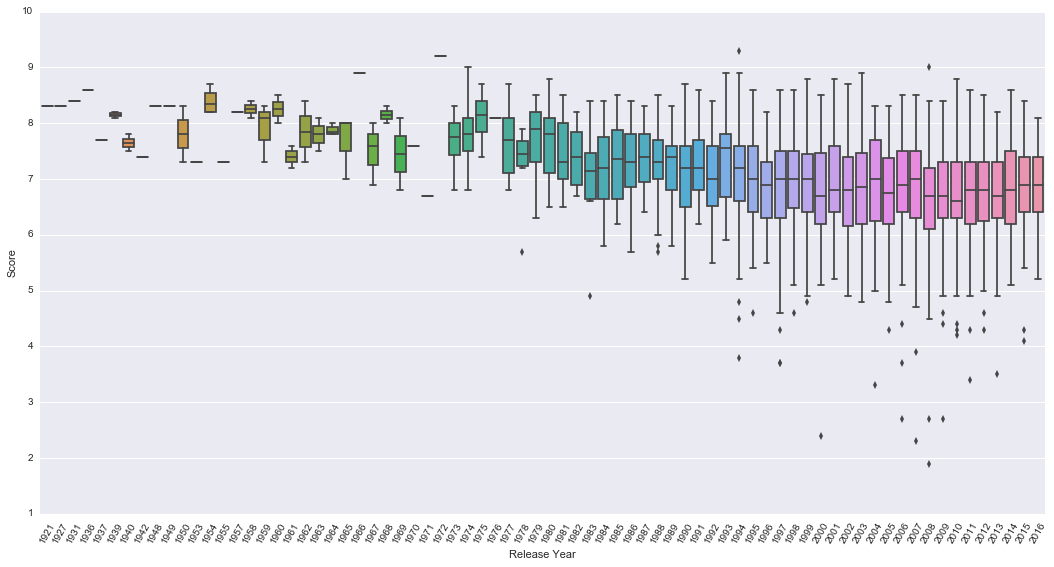

In [252]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=60)
sns.boxplot(df['Release Year'], df.Score);

In [218]:
import xgboost as xgb

0.305729841524


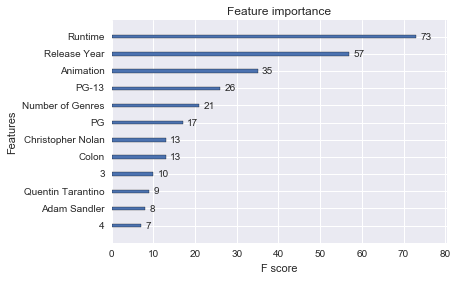

In [508]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.25, random_state=5)
gbm = xgb.XGBRegressor(max_depth=2, n_estimators=100, learning_rate=0.10).fit(X_train, y_train)
predictions = gbm.predict(X_test)
print gbm.score(X_test, y_test)
from xgboost import plot_importance
plt.figure(figsize=(10,7))
plot_importance(gbm)

In [436]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

kfold = KFold(len(X_train), n_folds=5, shuffle=True)
model = xgb.XGBRegressor(max_depth=3, n_estimators=100, learning_rate=0.10)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("XGBoost Mean Score: ", np.mean(scores))
scores = cross_val_score(lr , X_train, y_train, cv=kfold)
print(scores)
print("Linear Regression Mean Score: ", np.mean(scores))

print(np.sqrt(mean_squared_error(y_test, predictions)))

[ 0.36010423  0.2478021   0.30671407  0.30762666  0.23968768]
('XGBoost Mean Score: ', 0.29238694851678654)
[ 0.32122085  0.21594917  0.28928123  0.29575917  0.24250001]
('Linear Regression Mean Score: ', 0.27294208565035244)
0.768104426065


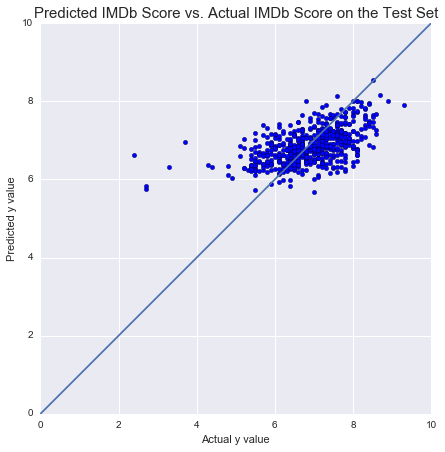

In [198]:
plt.figure(figsize=(7,7))
plt.title('Predicted IMDb Score vs. Actual IMDb Score on the Test Set', fontsize=15)
plt.ylim(0,10)
plt.xlim(0,10)
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')
plt.scatter(y_test, predictions)

plt.plot(xrange(11), xrange(11));

In [423]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

model = xgb.XGBRegressor()

grid = GridSearchCV(model, {
        "max_depth": range(2, 6, 1),
        "n_estimators": [10, 100, 1000],
        "learning_rate": [1e-2, 1e-1, 0.1]
    }, n_jobs=-1)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.2811863809790911

In [505]:
predictions = pd.Series(predictions, name = 'Predicted Score')

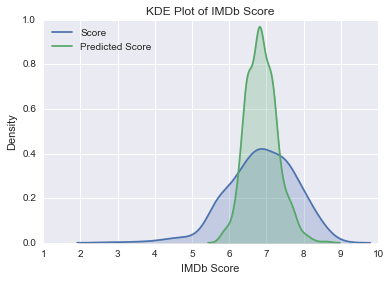

In [506]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(predictions, shade=True)
plt.title('KDE Plot of IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Density');